# CHURN PREDICTION SYSTEM 

# Step 1

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Importing Data

In [10]:
#Historical Purchase Data
siparis=pd.read_csv('Siparis.csv')

#Google Analytics Data
GoogleAnalytics=pd.read_csv('churn.csv')

#Merging data.
dataset=pd.merge(siparis,GoogleAnalytics,on='MusteriRef',how='inner')

dataset.head()

,MusteriRef,adi,Soyadi,MusteriKayıtYasi,Musteri_Sehir,TekrarOrani,KampanyalıSiparisOrani,1.Sıra,1.adet,1.Oran,...,Ortalama_Maliyet,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches
0,1665537,merve,bacaksızoğlu,1005,Tanımsız,0.000,0.0,CK1__Takım,2,0.250000,...,38.215000,10,141,15.100000,51,438.450980,11.254902,95,22,2
1,1666573,Nagihan,Ünal,1005,Tanımsız,0.125,0.0,BU8__Pantolon,5,0.147059,...,63.313333,23,-9,0.441165,25,1021.160000,18.320000,100,33,11
2,1669414,Esra,Şeker,1003,Tanımsız,0.000,0.0,BU8__Bermuda,1,0.125000,...,41.070000,38,-21,0.437427,46,330.500000,15.543478,155,23,2
3,1670568,rukiye,uğur,1003,KARAMAN,0.000,0.0,BU8__T-Shirt,9,0.529412,...,92.755000,27,65,3.407407,45,441.844444,13.222222,120,34,1
4,1673125,NaN,NaN,1001,Tanımsız,0.000,0.0,CU1__Gömlek,1,0.333333,...,19.530000,29,41,2.413793,28,358.928571,10.392857,73,9,11


# Data Discovering

### Let's have a quick look at columns

In [3]:
dataset.columns

Index(['MusteriRef', 'adi', 'Soyadi', 'MusteriKayıtYasi', 'Musteri_Sehir',
       'TekrarOrani', 'KampanyalıSiparisOrani', '1.Sıra', '1.adet', '1.Oran',
       '2.Sıra', '2.adet', '2.Oran', '3.Sıra', '3.adet', '3.Oran',
       'SonSiparisTarihiFarki', 'OrtalamaSiparişTarihiFarki',
       'IlkSiparisTarihiFarki', 'SiparisSayisi', 'SatisAdet',
       'IskontoluKDVli_Tutar_TL', 'IskontoluKDVsiz_Tutar_TL', 'Iskonto_tutar',
       'Kampanya İndirim Tutarı', 'Maliyet_Fiyati', 'BrutKar_TL',
       'Onaylanma-Teslim Edilme süresi', 'Recency_Score', 'Frequency_Score',
       'Monetary_Score', 'RFM Score', 'CLV_Degeri', 'IadeOran',
       'Ortalama_Sepet_Miktari', 'Ortalama_Sepet_Tutari', 'Ortalama_Maliyet',
       'Alisveris_Frekansi_Gun', 'Alisveris_Frekansi_Gun_Sapmasi',
       'Alisververis_Frekansi_Sapmasi_Carpani', 'Sessions',
       'Avg. Session Duration', 'Pages / Session', 'Product Detail Views',
       'Product Adds To Cart', 'Organic Searches'],
      dtype='object')

In [4]:
dataset.describe()

,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,1.adet,1.Oran,2.adet,2.Oran,3.adet,3.Oran,...,Ortalama_Maliyet,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches
count,1.259770e+05,125977.000000,125730.000000,125977.000000,125977.000000,125977.000000,123429.000000,123429.000000,113513.000000,113513.000000,...,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000,125977.000000
mean,1.916537e+06,1120.222310,0.140914,0.089681,4.090858,0.294520,2.449019,0.174333,1.836406,0.124053,...,69.409263,39.583575,29.094501,6.215510,63.312319,616.259898,15.123448,198.025425,34.571287,3.610953
std,1.288576e+06,800.312526,0.184130,0.186198,4.337959,0.172255,2.233321,0.090201,1.591447,0.060982,...,45.237656,32.340255,63.737831,15.948962,120.252491,440.280967,10.809862,381.100374,58.793195,7.644434
min,1.100000e+02,7.000000,0.000000,0.000000,1.000000,0.027027,1.000000,0.008403,1.000000,0.005236,...,3.500000,1.000000,-163.000000,0.063218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.388680e+05,433.000000,0.000000,0.000000,2.000000,0.166667,1.000000,0.111111,1.000000,0.080000,...,44.415000,17.000000,-13.000000,0.535714,11.000000,371.200000,9.204082,34.000000,7.000000,0.000000
50%,1.770993e+06,955.000000,0.090909,0.000000,3.000000,0.250000,2.000000,0.153846,1.000000,0.111111,...,59.955000,31.000000,25.000000,1.798817,28.000000,522.884615,12.545455,89.000000,17.000000,1.000000
75%,3.166208e+06,1708.000000,0.222222,0.000000,5.000000,0.375000,3.000000,0.214286,2.000000,0.153846,...,81.905000,53.000000,77.000000,4.812500,65.000000,741.800000,17.785714,208.000000,39.000000,4.000000
max,4.091524e+06,2885.000000,1.000000,1.000000,462.000000,1.500000,82.000000,0.666667,79.000000,0.333333,...,2105.750000,174.000000,183.000000,184.000000,4467.000000,9408.000000,242.000000,19125.000000,3168.000000,222.000000


### Lets check if null values existing

In [5]:
#missing data
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
Soyadi,46155,0.366376
adi,45708,0.362828
3.Sıra,16859,0.133826
Onaylanma-Teslim Edilme süresi,16199,0.128587
3.Oran,12464,0.098939
3.adet,12464,0.098939
2.Sıra,7134,0.056629
1.Sıra,4182,0.033197
2.adet,2548,0.020226
2.Oran,2548,0.020226


### Lets take a look at heatmap to understand if there is a relationship between columns that have nulls

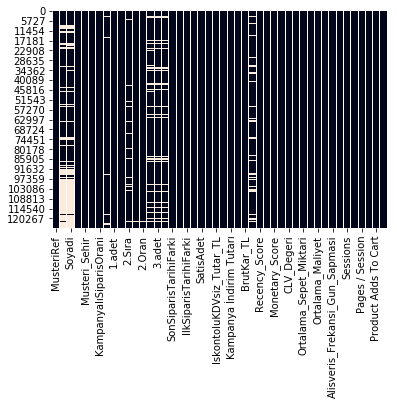

In [274]:
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

#### After have a conversation with business specialist, some of columns are not related with the subject of the project. Therefore We are going to drop some columns that doesn't mean anything to model,null columns and calculated columns

In [11]:
dataset=dataset.drop(['Onaylanma-Teslim Edilme süresi','1.Sıra','1.adet','1.Oran','2.Sıra','2.adet','2.Oran','3.Sıra','3.adet','3.Oran','adi','Soyadi','Musteri_Sehir','IskontoluKDVli_Tutar_TL','RFM Score'],axis=1)

#### Let's check agin and clean null values

In [16]:
dataset.isnull().sum()

MusteriRef                               0
MusteriKayıtYasi                         0
TekrarOrani                              0
KampanyalıSiparisOrani                   0
SonSiparisTarihiFarki                    0
OrtalamaSiparişTarihiFarki               0
IlkSiparisTarihiFarki                    0
SiparisSayisi                            0
SatisAdet                                0
IskontoluKDVsiz_Tutar_TL                 0
Iskonto_tutar                            0
Kampanya İndirim Tutarı                  0
Maliyet_Fiyati                           0
BrutKar_TL                               0
Recency_Score                            0
Frequency_Score                          0
Monetary_Score                           0
CLV_Degeri                               0
IadeOran                                 0
Ortalama_Sepet_Miktari                   0
Ortalama_Sepet_Tutari                    0
Ortalama_Maliyet                         0
Alisveris_Frekansi_Gun                   0
Alisveris_F

In [15]:
dataset=dataset.dropna()
dataset.isnull().sum()

,Total,Percent
Organic Searches,0,0.0
Recency_Score,0,0.0
MusteriKayıtYasi,0,0.0
TekrarOrani,0,0.0
KampanyalıSiparisOrani,0,0.0
SonSiparisTarihiFarki,0,0.0
OrtalamaSiparişTarihiFarki,0,0.0
IlkSiparisTarihiFarki,0,0.0
SiparisSayisi,0,0.0
SatisAdet,0,0.0


## Searching for relations between metrics

In [278]:
corr = dataset.corr()
corr.style.background_gradient()

,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,SonSiparisTarihiFarki,OrtalamaSiparişTarihiFarki,IlkSiparisTarihiFarki,SiparisSayisi,SatisAdet,IskontoluKDVsiz_Tutar_TL,Iskonto_tutar,Kampanya İndirim Tutarı,Maliyet_Fiyati,BrutKar_TL,Recency_Score,Frequency_Score,Monetary_Score,CLV_Degeri,IadeOran,Ortalama_Sepet_Miktari,Ortalama_Sepet_Tutari,Ortalama_Maliyet,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches
MusteriRef,1,-0.968212,-0.00168638,0.0645531,0.0696108,-0.036845,-0.157628,-0.0893246,-0.0860484,-0.0742543,0.0183789,0.0102215,-0.0769415,-0.0651648,-0.0839021,-0.260859,-0.0680091,0.220221,-0.106429,-0.0542884,-0.0393424,-0.0442743,-0.0486576,0.0729002,0.0716216,-0.0985604,-0.00783152,-0.0230918,-0.109009,-0.115585,-0.100624
MusteriKayıtYasi,-0.968212,1,0.00207147,-0.0516645,-0.0683088,0.0276742,0.137022,0.0836964,0.0801706,0.0705055,-0.0197293,-0.0126327,0.0734377,0.0610282,0.0815026,0.238567,0.0684603,-0.196613,0.107851,0.0497674,0.0385424,0.0441803,0.0386861,-0.0669423,-0.0636726,0.0958438,0.0105,0.0242686,0.106833,0.110313,0.0999877
TekrarOrani,-0.00168638,0.00207147,1,-0.031068,0.173594,0.215666,0.150142,0.251961,0.230561,0.230292,0.0451345,0.0379462,0.228754,0.223754,-0.133849,0.2035,0.0667921,0.0711565,0.0822588,0.0478731,0.0635383,0.0594617,-0.328206,0.286681,0.151641,0.0933997,-0.00927433,-0.00321141,0.109739,0.127838,0.0689674
KampanyalıSiparisOrani,0.0645531,-0.0516645,-0.031068,1,0.0253996,0.0221327,0.00437771,-0.0208818,0.0473751,0.0299754,0.182916,0.103616,0.0317428,0.0245034,-0.0338563,-0.0460851,0.120749,0.060927,-0.00868889,0.140482,0.100884,0.108831,0.0137893,0.0106067,0.00611972,-0.0011998,0.021073,0.00574272,-0.00100448,-0.000158145,-0.00382555
SonSiparisTarihiFarki,0.0696108,-0.0683088,0.173594,0.0253996,1,0.798226,0.304514,-0.251886,-0.193163,-0.191182,-0.0418544,-0.0289587,-0.197473,-0.173857,-0.855061,-0.251214,-0.0376129,-0.0839535,-0.00695203,-0.0050816,-0.0191533,-0.0364697,-0.374181,0.882567,0.434449,-0.151774,-0.0117049,-0.0208533,-0.163901,-0.18065,-0.122855
OrtalamaSiparişTarihiFarki,-0.036845,0.0276742,0.215666,0.0221327,0.798226,1,0.705965,-0.031007,-0.0206164,-0.0249575,-0.0201404,-0.0163411,-0.0364747,-0.00801442,-0.673153,0.0177124,-0.00316177,-0.0864673,0.00811467,0.0162261,0.0026418,-0.0245798,-0.158983,0.633658,0.264984,-0.0471773,-0.0295511,-0.0400199,-0.0597289,-0.055011,-0.0462961
IlkSiparisTarihiFarki,-0.157628,0.137022,0.150142,0.00437771,0.304514,0.705965,1,0.224928,0.190635,0.177501,0.0178147,0.0109841,0.169287,0.181418,-0.247696,0.311456,0.0508922,-0.0684325,0.0238036,0.0564243,0.0424161,0.0207977,0.222261,0.0982913,-0.0303448,0.0919292,-0.0361466,-0.040267,0.0883768,0.117216,0.0621686
SiparisSayisi,-0.0893246,0.0836964,0.251961,-0.0208818,-0.251886,-0.031007,0.224928,1,0.770409,0.764067,0.110114,0.0630477,0.780441,0.70991,0.225215,0.556631,0.0848168,0.22935,0.0738523,0.0230021,0.0394892,0.0446974,-0.233762,-0.0559978,-0.0804964,0.351121,-0.0245714,-0.0302443,0.366089,0.469348,0.243541
SatisAdet,-0.0860484,0.0801706,0.230561,0.0473751,-0.193163,-0.0206164,0.190635,0.770409,1,0.956905,0.243385,0.21434,0.962144,0.917976,0.174157,0.447941,0.396963,0.318961,0.0680021,0.494502,0.462456,0.467699,-0.170654,-0.0473082,-0.0599699,0.290192,0.0438854,0.0407079,0.333976,0.522049,0.196447
IskontoluKDVsiz_Tutar_TL,-0.0742543,0.0705055,0.230292,0.0299754,-0.191182,-0.0249575,0.177501,0.764067,0.956905,1,0.266793,0.234053,0.990952,0.979252,0.170833,0.431183,0.419954,0.355741,0.0855703,0.433435,0.509632,0.50438,-0.169359,-0.0465921,-0.0548291,0.274996,0.0354259,0.0289072,0.32086,0.485612,0.191056


## Summary of Correlation Analysis


- There is a weak positive relationship between "First Purchase Date" and "Avg. Purchasing Freq.". That means some of our old costumers has better frequency.
- Some of costumers who came to site with organic search purchase more. But this is also a weak relation

### We should drop columns that have same meanings

In [279]:
dataset=dataset.drop(['SonSiparisTarihiFarki','OrtalamaSiparişTarihiFarki','Recency_Score','Frequency_Score','Monetary_Score'],axis=1)

# Okay now let's look at distrubitons of main metrics

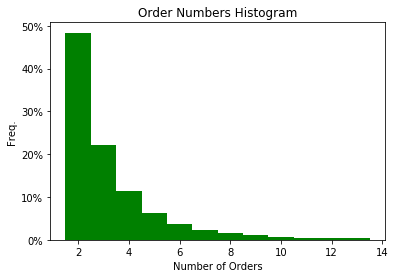

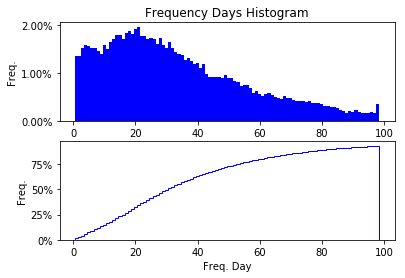

In [280]:
## Number of Orders Histogram
SiparisSayisi = dataset['SiparisSayisi'].values
plt.hist(SiparisSayisi, bins=np.arange(SiparisSayisi.min(), 15),color='g',align='left',weights=np.ones(len(SiparisSayisi)) / len(SiparisSayisi))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Order Numbers Histogram")
plt.xlabel("Number of Orders")
plt.ylabel("Freq.")
plt.show()

## Order Frequency
plt.subplot(211)
Frequency_Day = dataset['Alisveris_Frekansi_Gun'].values
plt.hist(Frequency_Day, bins=np.arange(Frequency_Day.min(), 100),color='b',align='left',weights=np.ones(len(Frequency_Day)) / len(Frequency_Day))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Frequency Days Histogram")
plt.xlabel("Freq. Day")
plt.ylabel("Freq.")

## Order Frequency Cumulative
plt.subplot(212)
Frequency_Day = dataset['Alisveris_Frekansi_Gun'].values
plt.hist(Frequency_Day, bins=np.arange(Frequency_Day.min(), 100),color='b',align='left',weights=np.ones(len(Frequency_Day)) / len(Frequency_Day),cumulative=True,histtype ='step')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Freq. Day")
plt.ylabel("Freq.")
plt.show()


## Summary of Histograms


- The costumers who ordered in last 6 months are our costumers for 3 years. 
- !! %70 of our customers order only 2-3 times in 6 months. !! That means most of our costumers leave the company after few order.
- %60 of our customers order with 40 days and less frequency

#### !!! After that analysis we should try more to hold costumers because of gaining new customer is more expensive then holding cost. Therefore, Let's make a Churn Prediction Project. !!!

#                                     CHURN PREDICTION

   #### Here will be 2 steps. First, we are going to cluster our costumers to label them as churn. After that, we are going to apply a neural network algorithm to get a churn rate for each costumer. 

## 1.Labeling Costumers as churn or not

#### We choosed 2 metrics to define customers as churned. 

In [281]:
X = dataset[['MusteriRef','Alisveris_Frekansi_Gun','Alisververis_Frekansi_Sapmasi_Carpani']].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fs = sc.fit_transform(X[:,1:])

## K-MEANS  

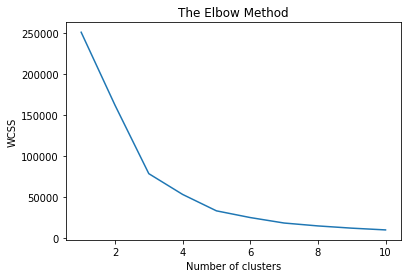

In [282]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_fs)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
del i,wcss

#### We pick 3 clusters as optimum cluster number

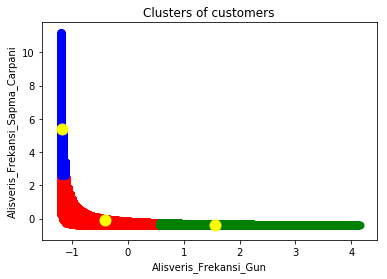

In [283]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_fs)


# Visualising the clusters

plt.scatter(X_fs[y_kmeans == 0, 0], X_fs[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_fs[y_kmeans == 1, 0], X_fs[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_fs[y_kmeans == 2, 0], X_fs[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 3], X[y_kmeans == 4, 4], s = 70, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 70, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Alisveris_Frekansi_Gun')
plt.ylabel('Alisveris_Frekansi_Sapma_Carpani')
#plt.legend()
plt.show()

In [284]:
#X ile Sınıfları birleştirme
y_kmeans=y_kmeans.reshape(len(y_kmeans),1)
birlesim=np.hstack((X, y_kmeans))
birlesim=pd.DataFrame(birlesim)
birlesim.columns=['MusteriRef','Alisveris_Frekansi_Gun','Alisveris_Frekansi_Gun_Sapmasi_Carpani','Cluster']
birlesim.head()

,MusteriRef,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi_Carpani,Cluster
0,1665537.0,10.0,15.100000,0.0
1,1666573.0,23.0,0.441165,0.0
2,1669414.0,38.0,0.437427,0.0
3,1670568.0,27.0,3.407407,0.0
4,1673125.0,29.0,2.413793,0.0


## Let's look at cluster

In [285]:
birlesim.groupby(['Cluster']).aggregate(['mean','count'])

MusteriRef        Alisveris_Frekansi_Gun         \
                 mean  count                   mean  count   
Cluster                                                      
0.0      1.915680e+06  95463              26.312645  95463   
1.0      2.265923e+06   2858               1.660602   2858   
2.0      1.876934e+06  27395              89.703340  27395   

        Alisveris_Frekansi_Gun_Sapmasi_Carpani         
                                          mean  count  
Cluster                                                
0.0                                   5.258184  95463  
1.0                                  92.121239   2858  
2.0                                   0.580850  27395

### As we can see, cluster-1 has the lowest frequency mean and the highest deviation. So we pick them as the churn group. 

In [286]:
Clustered_Group=birlesim[(birlesim.Cluster == 1)]

#Labeling main data
Clustered_Group=Clustered_Group.drop(['Alisveris_Frekansi_Gun','Alisveris_Frekansi_Gun_Sapmasi_Carpani'],axis=1)
dataset=pd.merge(dataset,Clustered_Group,on='MusteriRef',how='left')

,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,IlkSiparisTarihiFarki,SiparisSayisi,SatisAdet,IskontoluKDVsiz_Tutar_TL,Iskonto_tutar,Kampanya İndirim Tutarı,...,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches,Cluster
0,1665537,1005,0.000,0.0,161,2,8,178.91,0.0,0.0,...,10,141,15.100000,51,438.450980,11.254902,95,22,2,NaN
1,1666573,1005,0.125,0.0,133,6,34,855.10,0.0,0.0,...,23,-9,0.441165,25,1021.160000,18.320000,100,33,11,NaN
2,1669414,1003,0.000,0.0,94,3,8,214.38,0.0,0.0,...,38,-21,0.437427,46,330.500000,15.543478,155,23,2,NaN
3,1670568,1003,0.000,0.0,119,2,17,378.43,0.0,0.0,...,27,65,3.407407,45,441.844444,13.222222,120,34,1,NaN
4,1673125,1001,0.000,0.0,128,3,3,113.96,0.0,0.0,...,29,41,2.413793,28,358.928571,10.392857,73,9,11,NaN


In [290]:
dataset.fillna(0, inplace=True)
dataset.head()

,MusteriRef,MusteriKayıtYasi,TekrarOrani,KampanyalıSiparisOrani,IlkSiparisTarihiFarki,SiparisSayisi,SatisAdet,IskontoluKDVsiz_Tutar_TL,Iskonto_tutar,Kampanya İndirim Tutarı,...,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,Alisververis_Frekansi_Sapmasi_Carpani,Sessions,Avg. Session Duration,Pages / Session,Product Detail Views,Product Adds To Cart,Organic Searches,Cluster
0,1665537,1005,0.000,0.0,161,2,8,178.91,0.0,0.0,...,10,141,15.100000,51,438.450980,11.254902,95,22,2,0.0
1,1666573,1005,0.125,0.0,133,6,34,855.10,0.0,0.0,...,23,-9,0.441165,25,1021.160000,18.320000,100,33,11,0.0
2,1669414,1003,0.000,0.0,94,3,8,214.38,0.0,0.0,...,38,-21,0.437427,46,330.500000,15.543478,155,23,2,0.0
3,1670568,1003,0.000,0.0,119,2,17,378.43,0.0,0.0,...,27,65,3.407407,45,441.844444,13.222222,120,34,1,0.0
4,1673125,1001,0.000,0.0,128,3,3,113.96,0.0,0.0,...,29,41,2.413793,28,358.928571,10.392857,73,9,11,0.0


In [341]:
sns.countplot(x='Cluster', data=dataset)

### Now lets look at summary of Churn costumers and Non-Churn costumers

In [299]:

dataset.groupby(['Cluster']).aggregate({'MusteriRef':'count','Alisveris_Frekansi_Gun': 'mean','Alisveris_Frekansi_Gun_Sapmasi': 'mean','SiparisSayisi':'mean' , 'Sessions' :'mean','KampanyalıSiparisOrani':'mean','Ortalama_Sepet_Tutari':'mean'})

,MusteriRef,Alisveris_Frekansi_Gun,Alisveris_Frekansi_Gun_Sapmasi,SiparisSayisi,Sessions,KampanyalıSiparisOrani,Ortalama_Sepet_Tutari
Cluster,,,,,,,
0.0,122858,40.447565,26.754497,3.519234,64.215289,0.089673,146.415380
1.0,2858,1.660602,131.534640,2.299510,27.918474,0.096342,147.542244


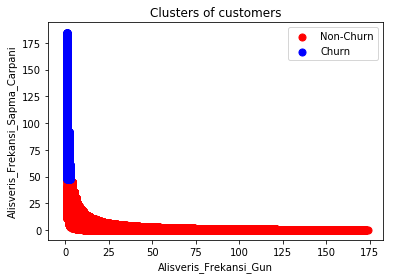

In [339]:
# Visualising the clusters
NonChurn=dataset['Cluster'] == 0
Churn=dataset['Cluster'] == 1
NonChurn=dataset[NonChurn]
Churn=dataset[Churn]

ChurnFreq=Churn['Alisveris_Frekansi_Gun'].values
NonChurnFreq=NonChurn['Alisveris_Frekansi_Gun'].values

ChurnDevi=Churn['Alisververis_Frekansi_Sapmasi_Carpani'].values
NonChurnDevi=NonChurn['Alisververis_Frekansi_Sapmasi_Carpani'].values


plt.scatter(NonChurnFreq, NonChurnDevi, s = 50, c = 'red', label = 'Non-Churn')
plt.scatter(ChurnFreq,ChurnDevi, s = 50, c = 'blue', label = 'Churn')
plt.title('Clusters of customers')
plt.xlabel('Alisveris_Frekansi_Gun')
plt.ylabel('Alisveris_Frekansi_Sapma_Carpani')
plt.legend()
plt.show()


# Step 2

# ANN - CHURN PREDICTION

## Data Pre-Processing

In [346]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125716 entries, 0 to 125715
Data columns (total 27 columns):
MusteriRef                               125716 non-null int64
MusteriKayıtYasi                         125716 non-null int64
TekrarOrani                              125716 non-null float64
KampanyalıSiparisOrani                   125716 non-null float64
IlkSiparisTarihiFarki                    125716 non-null int64
SiparisSayisi                            125716 non-null int64
SatisAdet                                125716 non-null int64
IskontoluKDVsiz_Tutar_TL                 125716 non-null float64
Iskonto_tutar                            125716 non-null float64
Kampanya İndirim Tutarı                  125716 non-null float64
Maliyet_Fiyati                           125716 non-null float64
BrutKar_TL                               125716 non-null float64
CLV_Degeri                               125716 non-null float64
IadeOran                                 125716 non-nu